In [175]:
from datasets import load_dataset
ds = load_dataset('json', data_files="../../data/apps_intro_test_printllama_0.json", split='train')
ds

Extracting data files: 100%|██████████| 1/1 [00:00<00:00, 230.58it/s]
Generating train split: 100 examples [00:00, 444.21 examples/s]


Dataset({
    features: ['correct_solution_accuracy', 'difficulty', 'correct_solution', 'solutions', 'url', 'question', 'starter_code', 'problem_id', 'input_output', 'correct_solution_idx', 'formatted_solution_accuracy', 'faulty_solution_accuracy', 'repaired_solution_accuracy', 'formatted_solution_deterministic_accuracy', 'faulty_solution_deterministic_accuracy', 'repaired_solution_deterministic_accuracy', 'formatted_solutions', 'faulty_solutions', 'repaired_solutions', 'formatted_print_outputs', 'faulty_print_outputs', 'repaired_print_outputs', 'formatted_errors', 'faulty_errors', 'repaired_errors', 'codellama_prints_7b', 'codellama_responses_7b', 'print_repairs_accuracy', 'print_repairs_deterministic_accuracy', 'print_repairs_prints', 'print_repairs_errors', 'print_returns_accuracy', 'print_returns_deterministic_accuracy', 'print_returns_prints', 'print_returns_errors'],
    num_rows: 100
})

In [184]:
import numpy as np

def get_accuracies(ds):
    accuracies = {feature: [] for feature in ds.features if 'accur' in feature and 'print_returns' not in feature}
    for i in range(len(ds)):
        for feature in accuracies:
            accuracies[feature].append(np.max(ds[i][feature]) if isinstance(ds[i][feature], list) else ds[i][feature])
   
    return accuracies

accuracies = get_accuracies(ds)
# filter accuracies for formatted_solution_accuracy == 1
filtered_accuracies = {}
for feature in accuracies:
    filtered_accuracies[feature] = [accuracy for i, accuracy in enumerate(accuracies[feature]) if accuracies['formatted_solution_accuracy'][i] == 1.0]
# len(accuracies['baseline_repaired_solution_accuracy'])
# plt.hist(accuracies['baseline_repaired_solution_accuracy'])
len(filtered_accuracies['correct_solution_accuracy'])
accuracies

{'correct_solution_accuracy': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'formatted_solution_accuracy': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.0,
  0.1,
  1.0,
  1.0,
  1.0,
  1.0,
  0.2207792208,
  1.0,
  1.0,
  0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0204081633,
  0.7142857143,
  1.0,
  

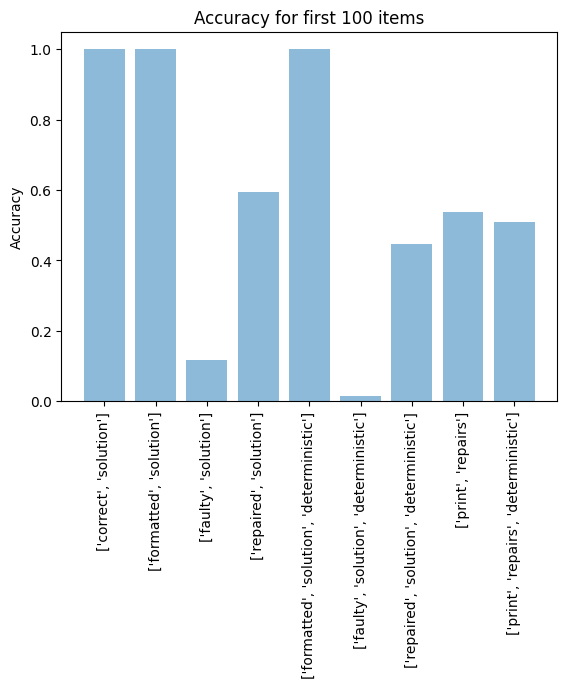

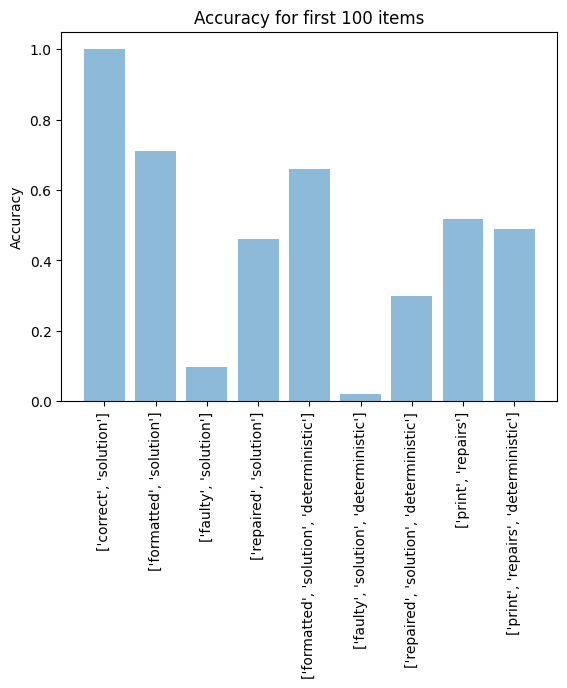

In [185]:
import matplotlib.pyplot as plt
import numpy as np

def plot_accuracies(accuracies):
    # Ensure 'accuracies' is a dictionary with lists (or arrays) of values
    feature_names = list(accuracies.keys())
    mean_accuracies = [np.mean(accuracies[feature]) for feature in accuracies]

    plt.bar(range(len(mean_accuracies)), mean_accuracies, align='center', alpha=0.5)
    plt.xticks(range(len(feature_names)), [f.split("_")[:-1] for f in feature_names], rotation=90)
    plt.ylabel('Accuracy')
    plt.title('Accuracy for first 100 items')
    

    plt.show()

plot_accuracies(filtered_accuracies)
len(filtered_accuracies['correct_solution_accuracy'])
plot_accuracies(accuracies)

In [137]:
def get_best_prints(ds):
    best_prints = []
    for i in range(len(ds)):
        print_accuracies = ds[i]['print_repairs_accuracy']
        codellama_prints = ds[i]['codellama_prints_7b']
        best_acc_idx = np.argmax(print_accuracies)
        best_print = codellama_prints[best_acc_idx]
        best_prints.append(best_print)
    return best_prints

best_prints = get_best_prints(ds)

In [138]:
print(best_prints[0][0])

def solution_algorithm(input_values):
    input_lines = input_values.split('\n')
    n = int(input_lines[0])
    seq = sorted(list(map(int, input_lines[1].split())))[::-1]
    print(f'Original sequence: {seq}')

    a = seq[0]
    last = -1
    for i in range(len(seq)):
        if a % seq[i] != 0:
            if last != seq[i]:
                last = seq[i]
                print(f'Last divisor: {last}')
            else:
                b = seq[i]
                break
        else:
            b = seq[i]
            print(f'Found divisor: {b}')

    print(f'x: {a}, y: {b}')
    return a, b



In [139]:
from printllama.helpers import get_llama_messages, format_llama_message


system, user, assistant = get_llama_messages(ds[0]['question'], ds[0]['faulty_solutions'], best_prints[0][0])
message = format_llama_message(system, user, assistant)
print(message)

[INST] <<SYS>>
You are an expert computer science researcher and programmer, especially skilled at debugging algorithms.
<</SYS>>

I have to solve the following problem:

Recently you have received two positive integer numbers $x$ and $y$. You forgot them, but you remembered a shuffled list containing all divisors of $x$ (including $1$ and $x$) and all divisors of $y$ (including $1$ and $y$). If $d$ is a divisor of both numbers $x$ and $y$ at the same time, there are two occurrences of $d$ in the list.

For example, if $x=4$ and $y=6$ then the given list can be any permutation of the list $[1, 2, 4, 1, 2, 3, 6]$. Some of the possible lists are: $[1, 1, 2, 4, 6, 3, 2]$, $[4, 6, 1, 1, 2, 3, 2]$ or $[1, 6, 3, 2, 4, 1, 2]$.

Your problem is to restore suitable positive integer numbers $x$ and $y$ that would yield the same list of divisors (possibly in different order).

It is guaranteed that the answer exists, i.e. the given list of divisors corresponds to some positive integers $x$ and $y

In [209]:
print(a['canonical_solution'])

    for idx, elem in enumerate(numbers):
        for idx2, elem2 in enumerate(numbers):
            if idx != idx2:
                distance = abs(elem - elem2)
                if distance < threshold:
                    return True

    return False



In [210]:
print(a['test'])



METADATA = {
    'author': 'jt',
    'dataset': 'test'
}


def check(candidate):
    assert candidate([1.0, 2.0, 3.9, 4.0, 5.0, 2.2], 0.3) == True
    assert candidate([1.0, 2.0, 3.9, 4.0, 5.0, 2.2], 0.05) == False
    assert candidate([1.0, 2.0, 5.9, 4.0, 5.0], 0.95) == True
    assert candidate([1.0, 2.0, 5.9, 4.0, 5.0], 0.8) == False
    assert candidate([1.0, 2.0, 3.0, 4.0, 5.0, 2.0], 0.1) == True
    assert candidate([1.1, 2.2, 3.1, 4.1, 5.1], 1.0) == True
    assert candidate([1.1, 2.2, 3.1, 4.1, 5.1], 0.5) == False




In [211]:
ds.features

{'correct_solution_accuracy': Value(dtype='float64', id=None),
 'difficulty': Value(dtype='string', id=None),
 'correct_solution': Value(dtype='string', id=None),
 'solutions': Value(dtype='string', id=None),
 'url': Value(dtype='string', id=None),
 'question': Value(dtype='string', id=None),
 'starter_code': Value(dtype='string', id=None),
 'problem_id': Value(dtype='int64', id=None),
 'input_output': Value(dtype='string', id=None),
 'correct_solution_idx': Value(dtype='int64', id=None),
 'formatted_solution_accuracy': Value(dtype='float64', id=None),
 'faulty_solution_accuracy': Value(dtype='float64', id=None),
 'repaired_solution_accuracy': Value(dtype='float64', id=None),
 'formatted_solution_deterministic_accuracy': Value(dtype='int64', id=None),
 'faulty_solution_deterministic_accuracy': Value(dtype='int64', id=None),
 'repaired_solution_deterministic_accuracy': Value(dtype='int64', id=None),
 'formatted_solutions': Value(dtype='string', id=None),
 'faulty_solutions': Value(dtype

In [7]:
sol = "def solution_algorithm(input_values):\n    input_lines = input_values.split('\\n')\n    n = int(input_lines[0])\n    seq = sorted(list(map(int, input_lines[1].split())))[::-1]\n    print(f'Original sequence: {seq}')\n\n    a = seq[0]\n    last = -1\n    for i in range(len(seq)):\n        if a % seq[i] != 0:\n            if last != seq[i]:\n                last = seq[i]\n                print(f'Last divisor: {last}')\n            else:\n                b = seq[i]\n                break\n        else:\n            b = seq[i]\n            print(f'Found divisor: {b}')\n\n    print(f'x: {a}, y: {b}')\n    return a, b\n"
try:
    exec(sol, globals())
except Exception as e:
    print(e)

In [21]:
from printllama.helpers import evaluate_solutions

In [3]:
# evaluate_solutions(solution, input_output_pairs)


def compare_outputs(
    actual: str,
    expected: str,
) -> bool:
    """Compare outputs."""
    expected_normalized = expected.strip().split()
    if isinstance(actual, (tuple, list)):
        actual_normalized = [str(item) for item in actual]
    else:
        actual_normalized = [str(actual)]

    return actual_normalized == expected_normalized

In [4]:
results, print_outputs, error_messages = [], [], []   

import contextlib
import io

for input, output in zip(input_output_pairs['inputs'], input_output_pairs['outputs']):
    with io.StringIO() as buf, contextlib.redirect_stdout(buf):
        try:
            result = solution_algorithm(input)
            results.append(compare_outputs(result, output))
        except Exception as e:
            results.append(False)
            error_messages.append(str(e))
        print_outputs.append(buf.getvalue())


accuracy = sum(1 for r in results if r == True) / len(results) if results else 0.0

In [5]:
print_outputs[0]

'Original sequence: [20, 10, 8, 5, 4, 4, 2, 2, 1, 1]\nFound divisor: 20\nFound divisor: 10\nLast divisor: 8\nFound divisor: 5\nFound divisor: 4\nFound divisor: 4\nFound divisor: 2\nFound divisor: 2\nFound divisor: 1\nFound divisor: 1\nx: 20, y: 1\n'

In [9]:
sol = """def solution_algorithm(input_values):
    input_lines = input_values.split('\\n')
    n = int(input_lines[0])
    divisors = list(map(int, input_lines[1].split()))
    divisors.sort(reverse=True)
    x = divisors[0]
    divisors = [d for d in divisors if x % d != 0 or divisors.count(d) > 1]
    y = divisors[0] if divisors else x
    return x, y"""
exec(sol, globals())

In [11]:
"def solution_algorithm(input_values):\n    input_lines = input_values.split('\\n')\n    n = int(input_lines[0])\n    seq = sorted(list(map(int, input_lines[1].split())))[::-1]\n    print(f'Original sequence: {seq}')\n\n    a = seq[0]\n    last = -1\n    for i in range(len(seq)):\n        if a % seq[i] != 0:\n            if last != seq[i]:\n                last = seq[i]\n                print(f'Last divisor: {last}')\n            else:\n                b = seq[i]\n                break\n        else:\n            b = seq[i]\n            print(f'Found divisor: {b}')\n\n    print(f'x: {a}, y: {b}')\n    return a, b\n"

(20, 8)

In [13]:
a = """def solution_algorithm(input_values):\n    input_lines = input_values.split('\\n')\n    n = int(input_lines[0])\n    seq = sorted(list(map(int, input_lines[1].split())))[::-1]\n    print(f'Original sequence: {seq}')\n\n    a = seq[0]\n    last = -1\n    for i in range(len(seq)):\n        if a % seq[i] != 0:\n            if last != seq[i]:\n                last = seq[i]\n                print(f'Last divisor: {last}')\n            else:\n                b = seq[i]\n                break\n        else:\n            b = seq[i]\n            print(f'Found divisor: {b}')\n\n    print(f'x: {a}, y: {b}')\n    return a"""

In [15]:
exec(a)

In [5]:
instructions = 10 * [[
            {
                "role": "system",
                "content": "You are an expert researcher and programmer, especially skilled at debugging algorithms",
            },
            {
                "role": "user",
                "content": """Repair the algorithm below. 

The algorithm takes three inputs:

1. A tensor A of shape (m, n, k).
2. A tensor B of shape (k, p).
3. An integer slice_index set to -1.


The algorithm should return a tensor of shape (m, 1, p) which is the result of a matrix multiplication between a correctly sliced tensor from A and tensor B.

Here is the current incorrect solution:
```python
import torch

def algorithm(A, B, slice_index):
    m, n, k = A.shape
    p = B.shape[1]
    A_sliced = A[slice_index, :, :]
    result = torch.mm(A_sliced, B)
    return result.view(m, 1, p)  
```

Input: 
A = torch.randn(3, 4, 5)
B = torch.randn(5, 6)
slice_index = -1

You must return an improved solution. Be as creative as you can under the constraints.
Your primary improvement must be novel and non-trivial. First, propose an idea, then implement it. 
You algorithm has to run within max of 2 seconds and you are not allowed to use external libraries besides torch.

Format your improved solution as follows:
```python
def algorithm(A, B, slice_index):
    # Your code here
```""",
            }
        ]
]

In [8]:
len(instructions[0])


2